In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("./../01_timestamp/data/dc_bikes_with_features.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,part_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,1,0,0,night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,2011,1,1,1,0,night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2011,1,1,2,0,night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,2011,1,1,3,0,night
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,2011,1,1,4,0,night


In [23]:
df['weekday'] = df['datetime'].dt.weekday
df['hour'] = df['datetime'].dt.hour

In [25]:
pivot_table = pd.pivot_table(df, values='count', 
                             index='weekday', 
                             columns='hour', 
                             aggfunc='mean')
pivot_table

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,39.542857,20.644231,13.693069,7.534653,6.123711,20.423077,79.730769,227.365385,382.855769,213.192308,...,193.355769,208.615385,276.788462,470.173077,437.173077,315.721154,222.442308,161.480769,117.144231,75.336538
1,38.019802,21.366337,14.959596,8.322581,6.260000,20.770000,83.852941,234.490196,393.205882,213.215686,...,184.615385,198.432692,274.269231,478.288462,454.596154,314.730769,224.490385,164.932692,121.259615,76.038462
2,45.490385,26.326923,17.029412,10.000000,6.154639,21.807692,90.990385,254.336538,413.884615,226.913462,...,207.288462,222.201923,291.759615,488.009615,474.980583,346.233010,246.757282,189.203883,144.825243,87.980583
3,48.009709,24.558824,14.708738,8.356436,6.700000,24.135922,96.961165,274.398058,454.786408,240.766990,...,198.126214,212.252427,287.894231,495.865385,461.971154,335.884615,249.884615,192.942308,145.903846,97.317308
4,49.615385,25.288462,15.115385,8.610000,6.717172,23.533981,94.451923,256.240385,448.634615,246.144231,...,227.432692,236.653846,323.173077,502.471154,443.432692,318.307692,229.557692,175.750000,147.298077,105.096154
5,82.571429,57.704762,40.432692,19.872549,9.144231,15.485437,44.390476,107.800000,208.104762,196.695238,...,331.780952,341.276190,350.028571,388.857143,346.346154,278.903846,209.230769,169.288462,140.038462,107.634615
6,79.134615,59.548077,44.990196,22.323529,9.410000,16.080000,43.621359,110.809524,192.380952,183.723810,...,326.866667,327.828571,361.619048,393.952381,345.114286,266.047619,198.676190,149.057143,114.914286,78.171429


In [26]:
import seaborn as sns

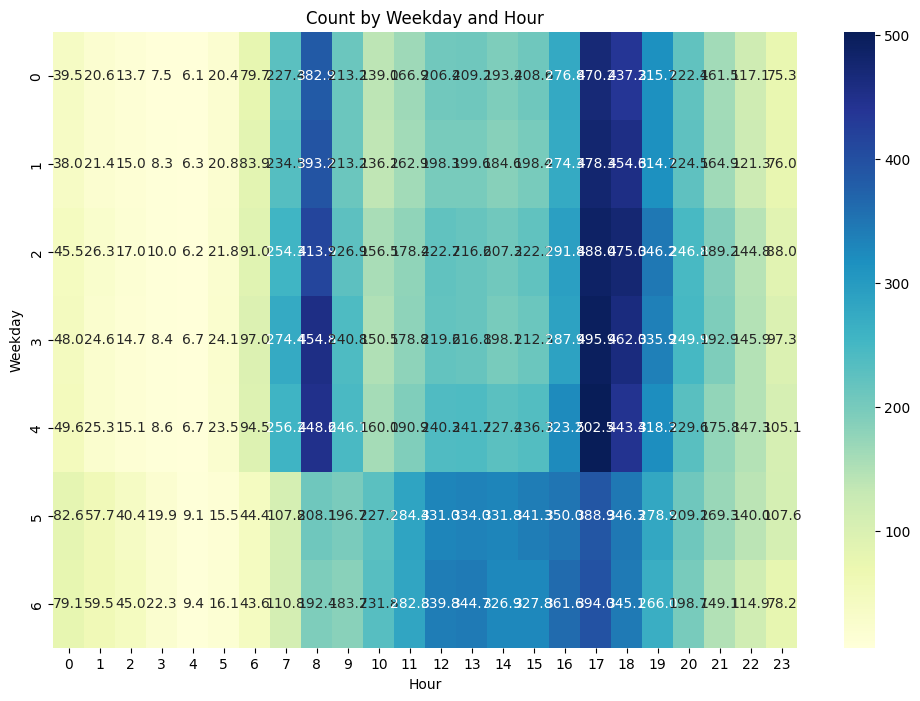

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", cbar=True)
plt.title('Count by Weekday and Hour')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.show()